In [1]:
import random as r
import numpy as np
import pandas as pd
import seaborn as sns

# Matplotlib Imports
import matplotlib  
import matplotlib.pyplot as plt
matplotlib.use(u'nbAgg')
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [2]:
csv_gram = pd.read_csv("csv.csv", sep=",", index_col=False)
doc_gram = pd.read_csv("doc.csv", sep=",", index_col=False)
gif_gram = pd.read_csv("gif.csv", sep=",", index_col=False)
gz_gram = pd.read_csv("gz.csv", sep=",", index_col=False)
html_gram = pd.read_csv("html.csv", sep=",", index_col=False)
jpg_gram = pd.read_csv("jpg.csv", sep=",", index_col=False)
log_gram = pd.read_csv("log.csv", sep=",", index_col=False)
pdf_gram = pd.read_csv("pdf.csv", sep=",", index_col=False)
png_gram = pd.read_csv("png.csv", sep=",", index_col=False)
ppt_gram = pd.read_csv("ppt.csv", sep=",", index_col=False)
ps_gram = pd.read_csv("ps.csv", sep=",", index_col=False)
txt_gram = pd.read_csv("txt.csv", sep=",", index_col=False)
xls_gram = pd.read_csv("xls.csv", sep=",", index_col=False)
xml_gram = pd.read_csv("xml.csv", sep=",", index_col=False)

In [3]:
csv_gram['??'] = 1
doc_gram['??'] = 2
gif_gram['??'] = 3
gz_gram['??'] = 4
html_gram['??'] = 5
jpg_gram['??'] = 6
log_gram['??'] = 7
pdf_gram['??'] = 8
png_gram['??'] = 9
ppt_gram['??'] = 10
ps_gram['??'] = 11
txt_gram['??'] = 12
xls_gram['??'] = 13
xml_gram['??'] = 14

In [4]:
print(jpg_gram.shape)
print(png_gram.shape)
#print(exe_gram.shape)
print(html_gram.shape)
print(pdf_gram.shape)
print(ppt_gram.shape)
print(xls_gram.shape)
print(doc_gram.shape)

(937, 258)
(209, 258)
(3839, 258)
(3766, 258)
(892, 258)
(667, 258)
(1102, 258)


In [5]:
#png_gram = png_gram.drop(png_gram.index[480:])
#html_gram = html_gram.drop(html_gram.index[470:])

In [6]:
files_df = pd.concat([csv_gram, doc_gram, gif_gram, gz_gram, html_gram, jpg_gram, log_gram, pdf_gram, png_gram, ppt_gram, ps_gram, txt_gram, xls_gram, xml_gram], axis=0)

In [7]:
files_df.drop(columns={'ID'}, axis=1, inplace=True)
files_df.rename(columns = {'??':'Class'}, inplace = True)
files_df = files_df.fillna(0)
files_df.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,Class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18203,455,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
18204,456,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
18205,457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
18206,458,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14


In [8]:
files_df.to_csv('xai.csv')

In [9]:
#ROC_AUC

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

features = files_df.iloc[:, 0:255]
target = files_df.Class

#target = label_binarize(target, classes=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
target[:5]

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_ranking.py:1016: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


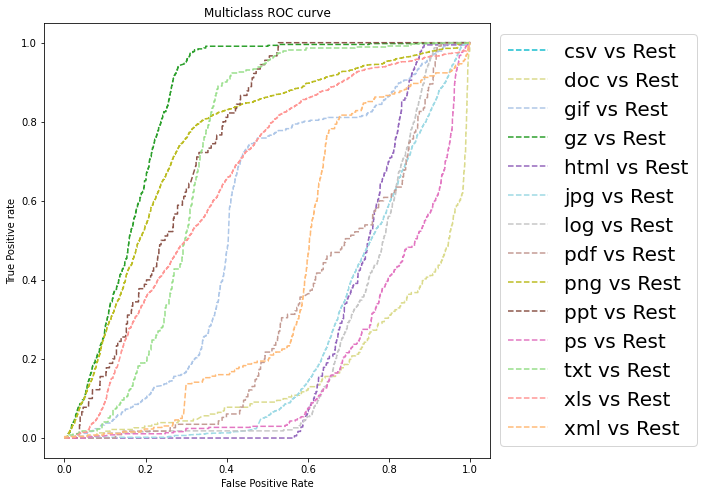

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import random

# generate 2 class dataset
#X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

X = files_df.iloc[:, 0:255]
y = files_df.Class

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 14

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
#available_colors = plt.cm.colors.cnames.keys()
#random_colors = random.sample(available_colors, n_class)

color_map = plt.cm.get_cmap("tab20")

random_indices = random.sample(range(color_map.N), n_class)
random_colors = [color_map(i) for i in random_indices]

# Convert the RGBA values to hex strings
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))

random_colors_hex = [rgb_to_hex(color[:3]) for color in random_colors]


colors_list = list(random_colors_hex)

plt.figure(figsize=(8,8))

    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color=colors_list[0], label='csv vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color=colors_list[1], label='doc vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color=colors_list[2], label='gif vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color=colors_list[3], label='gz vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color=colors_list[4], label='html vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color=colors_list[5], label='jpg vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color=colors_list[6], label='log vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color=colors_list[7], label='pdf vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color=colors_list[8], label='png vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color=colors_list[9], label='ppt vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color=colors_list[10], label='ps vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color=colors_list[11], label='txt vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color=colors_list[12], label='xls vs Rest')
plt.plot(fpr[13], tpr[13], linestyle='--',color=colors_list[13], label='xml vs Rest')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.savefig('Multiclass ROC');  

In [ ]:
#back to models
X = files_df.iloc[:, 0:255]
y = files_df.Class

In [9]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

print("Before oversampling",  X.shape, y.shape)
        
#oversample = RandomOverSampler(sampling_strategy="not majority")     
#X, y = oversample.fit_resample(X, y)


sm = SMOTE()
X, y = sm.fit_resample(X, y)
        
print("After oversampling",  X.shape, y.shape)

Before oversampling (18208, 255) (18208,)
After oversampling (53746, 255) (53746,)


Accuracy: 0.92


C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


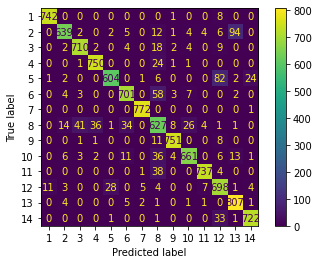

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       751
           2       0.95      0.83      0.89       769
           3       0.93      0.95      0.94       751
           4       0.95      0.97      0.96       777
           5       0.95      0.84      0.89       722
           6       0.92      0.90      0.91       778
           7       0.99      1.00      0.99       773
           8       0.75      0.79      0.77       793
           9       0.97      0.97      0.97       772
          10       0.94      0.89      0.91       743
          11       0.98      0.94      0.96       780
          12       0.82      0.92      0.86       761
          13       0.88      0.98      0.93       822
          14       0.96      0.95      0.96       758

    accuracy                           0.92     10750
   macro avg       0.93      0.92      0.92     10750
weighted avg       0.93      0.92      0.92     10750



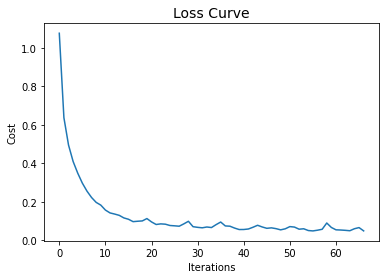

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2)

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, trainY)

y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
#fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

print(classification_report(testY, y_pred))

plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [11]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
#grid.fit(trainX_scaled, trainY)

#print(grid.best_params_) 

#grid_predictions = grid.predict(testX_scaled) 

#print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

In [12]:
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1

In [13]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(y)

In [14]:

from imblearn.over_sampling import SMOTE, RandomOverSampler

print("Before oversampling",  X.shape, y.shape)
        
#oversample = RandomOverSampler(sampling_strategy="not majority")        
#X, y = oversample.fit_resample(X, dummy_y)

sm = SMOTE()
X, y = sm.fit_resample(X, y)
        
print("After oversampling",  X.shape, y.shape)

Before oversampling (53746, 255) (53746, 14)
After oversampling (53746, 255) (53746, 14)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40309, 255)
(40309, 14)
(13437, 255)
(13437, 14)


In [16]:
def baseline_model():
    model = Sequential()
    model.add(Dense(40, input_shape = (255,), activation = "relu"))
    model.add(Dense(20, activation = "relu"))
    model.add(Dropout(0.2))

    model.add(Dense(14, activation = "softmax"))
    model.compile(Adam(lr = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
    return model

In [17]:
model = baseline_model()
history = model.fit(X_train, y_train, validation_split= 0.1, verbose=1, epochs=100)

C:\Users\Razaq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1134/1134 [==============================] - 2s 1ms/step - loss: 1.9869 - accuracy: 0.3730 - val_loss: 1.1317 - val_accuracy: 0.5654
Epoch 2/100
1134/1134 [==============================] - 1s 1ms/step - loss: 1.2536 - accuracy: 0.5360 - val_loss: 0.9606 - val_accuracy: 0.6564
Epoch 3/100
1134/1134 [==============================] - 1s 1ms/step - loss: 1.0949 - accuracy: 0.5941 - val_loss: 0.9082 - val_accuracy: 0.6725
Epoch 4/100
1134/1134 [==============================] - 1s 1ms/step - loss: 0.9886 - accuracy: 0.6410 - val_loss: 0.7627 - val_accuracy: 0.7385
Epoch 5/100
1134/1134 [==============================] - 1s 1ms/step - loss: 0.9112 - accuracy: 0.6713 - val_loss: 0.7020 - val_accuracy: 0.7656
Epoch 6/100
1134/1134 [==============================] - 1s 1ms/step - loss: 0.8498 - accuracy: 0.6979 - val_loss: 0.7025 - val_accuracy: 0.7609
Epoch 7/100
1134/1134 [==============================] - 1s 1ms/step - loss: 0.8032 - accuracy: 0.7148 - val_loss: 0.6671 - val_ac

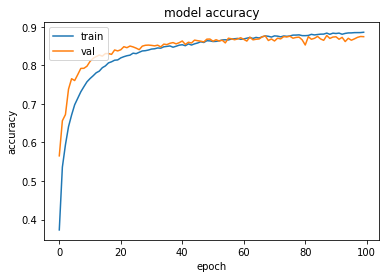

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

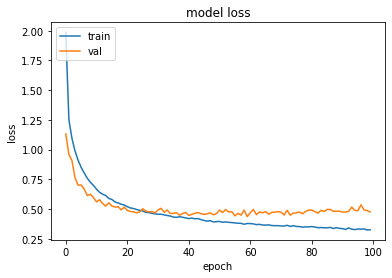

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(X_test)
type(y_pred)

numpy.ndarray

In [21]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[941,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,   0,
          9],
       [  0, 798,   1,  27,   2,  40,   0,  10,   1,  53,   1,   3,  16,
          1],
       [  0,   8, 799,  45,   0,  24,   0,  45,   2,   8,   0,   0,   0,
         20],
       [  0,  10,  19, 875,   0,  14,   0,  20,   6,  13,   0,   0,   0,
          0],
       [  5,   6,   0,   0, 758,   0,   4,   1,   0,   0,   4,  95,   1,
         78],
       [  0,   2,   5,  11,   1, 880,   0,  32,   2,  21,   0,   0,   0,
          1],
       [  0,   0,   0,   2,   0,   0, 937,   0,   0,   0,   0,  20,   0,
          0],
       [  0,  11,  75, 121,   1,  88,   0, 530,  21, 105,  25,   3,   0,
          1],
       [  0,   0,   1,   3,   0,   1,   0,   6, 944,   4,   0,   0,   0,
         12],
       [  0,  43,   7,  21,   0,  77,   0,  55,  11, 769,   0,   0,   3,
          3],
       [  0,   1,   0,   0,   0,   1,   0,   2,   0,   1, 906,   6,   0,
          0],
       [ 12,  15,   0,   0,  11,   0,  15, 

<AxesSubplot:>

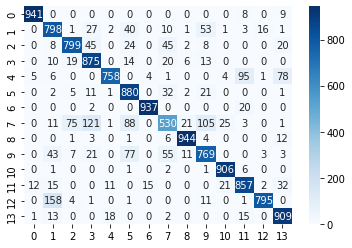

In [22]:
sns.heatmap(cm,annot=True, cmap='Blues', fmt='g')

In [23]:
#estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [24]:

from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       958
           1       0.75      0.84      0.79       953
           2       0.88      0.84      0.86       951
           3       0.79      0.91      0.85       957
           4       0.96      0.80      0.87       952
           5       0.78      0.92      0.85       955
           6       0.98      0.98      0.98       959
           7       0.75      0.54      0.63       981
           8       0.96      0.97      0.96       971
           9       0.78      0.78      0.78       989
          10       0.95      0.99      0.97       917
          11       0.85      0.89      0.87       965
          12       0.97      0.82      0.89       971
          13       0.85      0.95      0.90       958

    accuracy                           0.87     13437
   macro avg       0.87      0.87      0.87     13437
weighted avg       0.87      0.87      0.87     13437

